In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from xgboost import XGBClassifier
import pickle

In [9]:
df = pd.read_csv('df_feature_engineering.csv')
pd.set_option("display.max_columns", None)

In [10]:
df_inputs = df.drop(['Rain Tomorrow'],axis=1)

df_target = df['Rain Tomorrow']

# Step 1: Split into training+validation and testing sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_inputs.values, df_target.values, test_size=0.1, random_state=42)
# Step 2: Split training+validation set into training and validation sets (Of the 80% for training and validation, 90*0.21 = 12% is validation and 68% is training )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.21, random_state=42)

In [11]:
X_train.shape, X_test.shape, X_val.shape

((42898, 11), (6034, 11), (11404, 11))

In [12]:
y_train.shape, y_test.shape, y_val.shape

((42898,), (6034,), (11404,))

# Random Forrest

In [ ]:
# 20h44 - 

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf_clf.fit(X_train, y_train)

cv_results_rf = pd.DataFrame(grid_search_rf_clf.cv_results_)

# Best parameters found during cross-validation
best_params_rf = grid_search_rf_clf.best_params_
print("Best Parameters:", best_params_rf)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
cv_results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.760126,0.031667,0.098141,0.000503,True,10,2,2,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.776807,0.779138,0.777739,0.778646,0.777247,0.777915,0.000864,35
1,6.105509,0.529359,0.209829,0.016347,True,10,2,2,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.775991,0.779254,0.779487,0.778179,0.779695,0.778521,0.001369,25
2,13.724997,0.075931,0.459339,0.015342,True,10,2,2,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.777855,0.781002,0.778555,0.776431,0.778879,0.778544,0.001490,24
3,3.451521,0.139821,0.120511,0.001961,True,10,2,5,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.777972,0.780536,0.777040,0.776431,0.777713,0.777938,0.001406,34
4,6.995767,0.205552,0.239764,0.003126,True,10,2,5,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.777273,0.778205,0.779604,0.777830,0.778063,0.778195,0.000773,31
5,14.331407,0.837389,0.469408,0.016500,True,10,2,5,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.778089,0.779021,0.778904,0.777946,0.778646,0.778521,0.000431,26
6,3.534038,0.043267,0.119339,0.002348,True,10,4,2,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.776923,0.776690,0.777972,0.777247,0.779345,0.777635,0.000958,41
7,7.004679,0.246252,0.252897,0.004757,True,10,4,2,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.778904,0.778438,0.779138,0.778063,0.779112,0.778731,0.000418,21
8,14.064440,0.298006,0.473527,0.026452,True,10,4,2,200,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.777855,0.779138,0.779138,0.776431,0.778179,0.778148,0.000999,32
9,3.436412,0.145348,0.121101,0.005832,True,10,4,5,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.776923,0.776690,0.777972,0.777247,0.779345,0.777635,0.000958,41


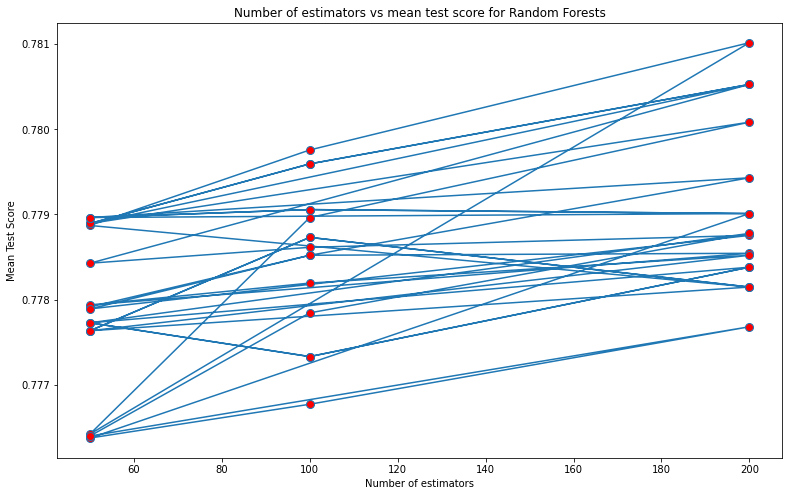

In [18]:
plt.figure(figsize=(13,8))
plt.plot(cv_results_rf['param_n_estimators'].to_numpy(),cv_results_rf['mean_test_score'].to_numpy(),marker='o',markerfacecolor='red', markersize=8)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Test Score')
plt.title('Number of estimators vs mean test score for Random Forests')
plt.show()

In [20]:
best_rf_clf = RandomForestClassifier(**best_params_rf)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)

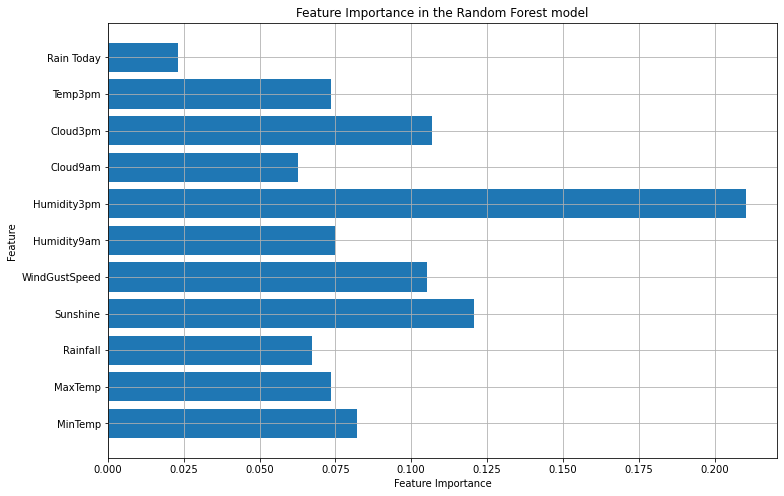

In [21]:
# Feature Importance
feature_importances = best_rf_clf.feature_importances_
feature_names = [f"{df.columns[i]}" for i in range(len(df.columns)-1)]

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in the Random Forest model')
plt.grid()
plt.show()

It is interesting to observe that the ranking of the feature importances from the random forest model are somewhat different from the feature engineering. Humidity3pm and sunshine are still the most important, as they were in the feature selection algorithms, but MinTemp, which was deemed the least important in the feature selection, is the fifth most important to the model.

It is also interesting to see that the model concludes that the fact that raining or not raining today, is not important to determine if it will rain tomorrow.

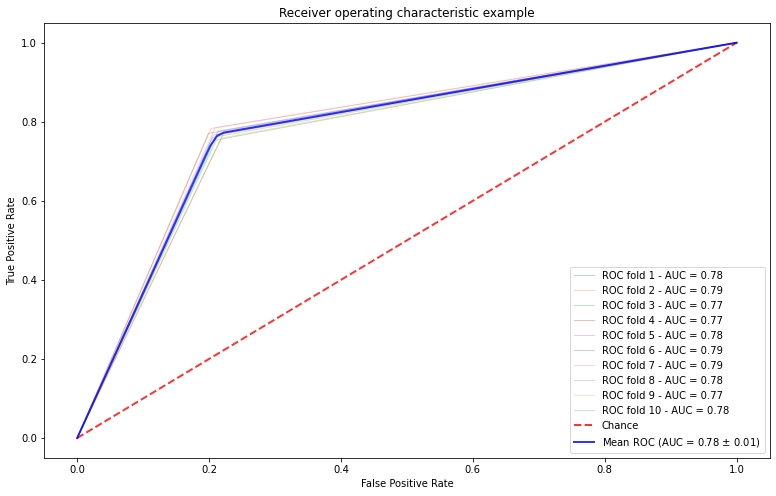

In [23]:
# KFold cross validation with 10 folds
seed=100
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Random Forest Classifier
clf_rfc = RandomForestClassifier(**best_params_rf)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(13,8))

for i, (train,test) in enumerate(kfold.split(df_inputs,df_target)):
    clf_rfc.fit(df_inputs.loc[train], df_target[train])
    y_pred2 = clf_rfc.predict(df_inputs.loc[test]) 
    fpr, tpr, _ = roc_curve(df_target[test], y_pred2[:])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [24]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_clf, file)

# XGBoost

In [26]:
param_grid = {
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
}

# XGBoost classifier
xgb_clf = XGBClassifier()

# Perform GridSearchCV for hyperparameter tuning
xgb_clf_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
xgb_clf_search.fit(X_train, y_train)

cv_results_xgb = pd.DataFrame(xgb_clf_search.cv_results_)

best_params_xgb = xgb_clf_search.best_params_
print("Best Parameters:", best_params_xgb)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [27]:
cv_results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,30.149327,28.350680,0.025146,0.031538,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.766200,0.767599,0.767599,0.768504,0.768271,0.767635,0.000803,14
1,37.594820,57.844538,0.029681,0.021278,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.769697,0.772611,0.772960,0.774216,0.771768,0.772250,0.001500,10
2,67.814766,52.932794,0.051037,0.029644,0.01,10,100,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.771212,0.777389,0.775524,0.775149,0.774915,0.774838,0.002011,8
3,99.830266,36.404961,0.048597,0.024717,0.01,10,200,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.772494,0.778904,0.780420,0.776897,0.775265,0.776796,0.002773,6
4,144.038986,1.378075,0.069171,0.032397,0.01,20,100,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.758042,0.769814,0.762587,0.763725,0.765357,0.763905,0.003825,18
5,304.907658,34.038312,0.132177,0.041108,0.01,20,200,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.763287,0.772145,0.764569,0.767455,0.769554,0.767402,0.003228,15
6,0.349747,0.176428,0.009589,0.000813,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.777622,0.780769,0.781235,0.785406,0.779461,0.780899,0.002579,2
7,14.165273,27.102379,0.013304,0.000893,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.777972,0.784033,0.781352,0.784241,0.781560,0.781831,0.002274,1
8,56.974645,53.220426,0.017358,0.002019,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.773427,0.780303,0.777156,0.778879,0.780394,0.778032,0.002586,3
9,58.069708,32.539541,0.049666,0.025635,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.771445,0.781818,0.778904,0.777480,0.777596,0.777449,0.003385,5


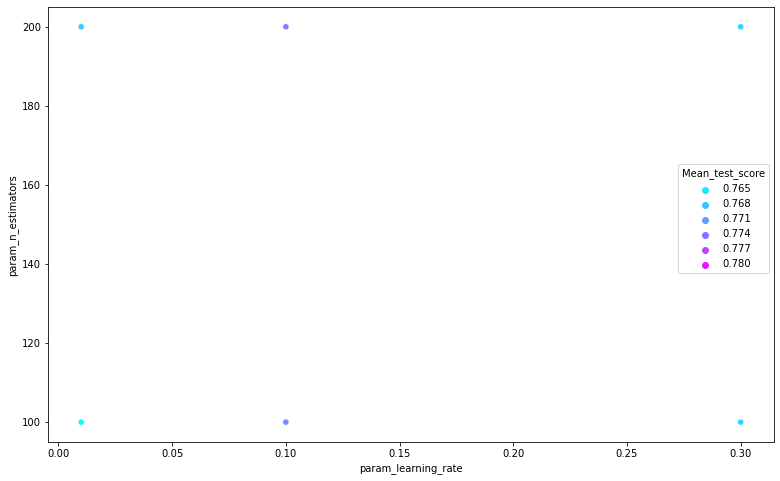

In [28]:
plt.figure(figsize=(13,8))
sns.scatterplot(x='param_learning_rate', y='param_n_estimators',data=cv_results_xgb, hue='mean_test_score',palette='cool')
plt.legend(title='Mean_test_score',bbox_to_anchor=(1, 0.65))

It can be seen that what differentiates the most in terms of test_score is the learning rate, but given a certain learning rate, the bigger the number of estimators, the better, for these cases

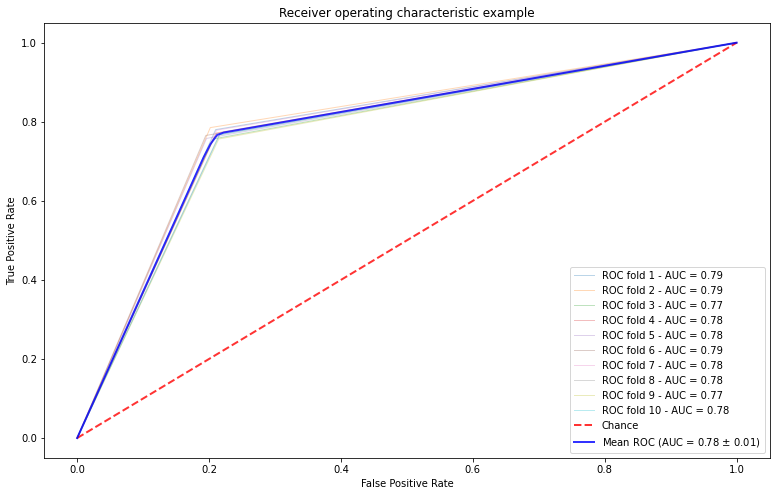

In [29]:
# KFold cross validation with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# XGBoost Classifier
best_xgb_clf = XGBClassifier(**best_params_xgb)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(13,8))

for i, (train,test) in enumerate(kfold.split(df_inputs,df_target)):
    best_xgb_clf.fit(df_inputs.loc[train], df_target[train])
    y_pred3 = best_xgb_clf.predict(df_inputs.loc[test]) 
    fpr, tpr, _ = roc_curve(df_target[test], y_pred3[:])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [30]:
best_xgb_clf = XGBClassifier(**best_params_xgb)
best_xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

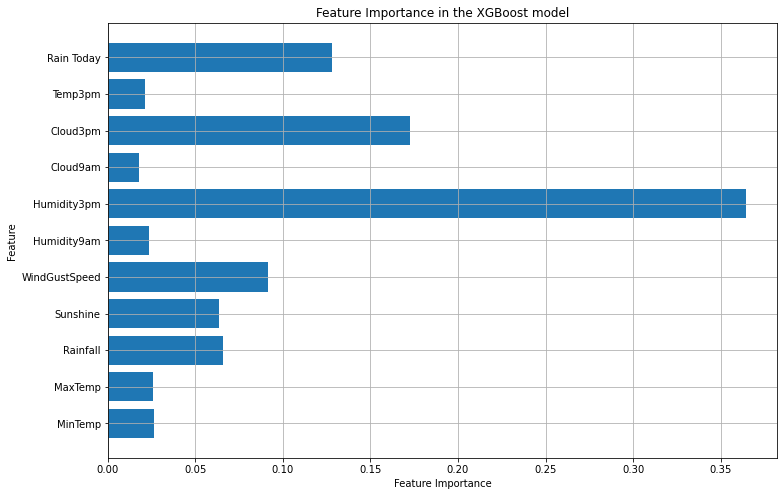

In [31]:
# Feature Importance
feature_importances = best_xgb_clf.feature_importances_
feature_names = [f"{df.columns[i]}" for i in range(len(df.columns)-1)]

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in the XGBoost model')
plt.grid()
plt.show()

For the xgboost model, the importance of humidity3pm continues to be the most important but in this case, compared to the random forest model, it is much more important than the other features. The order of the features' importance is the same as it was in the random forest.

In [32]:
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_clf, file)